In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sales_2025.csv')
data.columns = data.columns.str.strip()
data.head()

,InvoiceNumber,Date,InvoiceType,NetAmount,PaymentMethod,CustomerName,CustomerMobileNumber,Address1,City,Pincode,State,Quantity,UnitPrice,Discount,PromotionalDiscount,BasicAmount,ItemTotal,Description
0,1663,01-01-2025,Sale,31700.01,Cash,GRAMPANCHAYATHI,9392096445,SUDEPALLE VILLAGE,VELDURTHI MANDAL,518216,ANDHRA PRADESH,1,26864.41,0.00,0,26864.41,31700.01,TRF 2017 S + SF022
1,1664,01-01-2025,Sale,15799.99,Cash,P.MADHU,8074892078,KONGANAPADU,KURNOOL,518218,ANDHRA PRADESH,1,13389.83,0.00,0,13389.83,15799.99,TSP 3
2,1665,02-01-2025,Sale,27500.24,Cash,PRESIDENT,8978133398,GR HOMES,KURNOOL,518002,ANDHRA PRADESH,1,23305.28,1439.77,0,23305.28,27500.24,TRF 520 H + TF011
3,1666,02-01-2025,Sale,14999.74,Cash,A.NARAYANA REDDY,9440292724,KRISHNA NAGAR,KURNOOL,518002,ANDHRA PRADESH,1,12711.64,800.27,0,12711.64,14999.74,TSP 3
4,1667,02-01-2025,Sale,25560.00,Cash,RANGASWAMY,9963616195,BR REDDY COLONY,KURNOOL,518002,ANDHRA PRADESH,1,21661.02,0.00,0,21661.02,25560.00,TRF 520 HS + SF011-R


EDA

In [3]:
data.isnull().sum()

InvoiceNumber           0
Date                    0
InvoiceType             0
NetAmount               0
PaymentMethod           0
CustomerName            0
CustomerMobileNumber    0
Address1                0
City                    0
Pincode                 0
State                   0
Quantity                0
UnitPrice               0
Discount                0
PromotionalDiscount     0
BasicAmount             0
ItemTotal               0
Description             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   InvoiceNumber         1252 non-null   int64  
 1   Date                  1252 non-null   object 
 2   InvoiceType           1252 non-null   object 
 3   NetAmount             1252 non-null   float64
 4   PaymentMethod         1252 non-null   object 
 5   CustomerName          1252 non-null   object 
 6   CustomerMobileNumber  1252 non-null   int64  
 7   Address1              1252 non-null   object 
 8   City                  1252 non-null   object 
 9   Pincode               1252 non-null   int64  
 10  State                 1252 non-null   object 
 11  Quantity              1252 non-null   int64  
 12  UnitPrice             1252 non-null   float64
 13  Discount              1252 non-null   float64
 14  PromotionalDiscount   1252 non-null   int64  
 15  BasicAmount          

In [5]:
data.describe()

,InvoiceNumber,NetAmount,CustomerMobileNumber,Pincode,Quantity,UnitPrice,Discount,PromotionalDiscount,BasicAmount,ItemTotal
count,1252.000000,1252.000000,1.252000e+03,1252.000000,1252.000000,1252.000000,1252.000000,1252.0,1252.000000,1252.000000
mean,1179.432109,18134.744249,9.067492e+09,517464.782748,3.638179,14167.792644,445.637492,0.0,14550.195248,17169.227780
std,871.796057,12638.241411,9.270554e+08,3163.586749,26.333213,8510.310747,1300.485869,0.0,8754.713238,10330.562885
min,1.000000,3650.000000,6.002727e+09,509103.000000,1.000000,50.850000,0.000000,0.0,2966.100000,3500.000000
25%,293.750000,12879.990000,8.674495e+09,518002.000000,1.000000,10915.250000,0.000000,0.0,10915.250000,12879.990000
50%,1696.500000,12879.990000,9.440480e+09,518003.000000,1.000000,10915.250000,0.000000,0.0,10915.250000,12879.990000
75%,2003.250000,18480.000000,9.701627e+09,518216.000000,1.000000,14745.767500,0.000000,0.0,14846.760000,17519.180000
max,2311.000000,136261.670000,9.989965e+09,590125.000000,646.000000,63618.640000,26292.200000,0.0,78999.340000,93219.220000


Location-Based Demand Analysis


In [6]:
cities = data.groupby('City')['ItemTotal'].sum().sort_values(ascending=False)
states = data.groupby('State')['ItemTotal'].sum().sort_values(ascending=False)

In [7]:
print(cities)
print(states)

City
KURNOOL                   7996653.77
KURNOOL                   7797162.59
KURNOOL DIST              2423511.96
JOGULAMBA GADWALA DIST     555020.30
NANDYAL DIST               327681.10
                             ...    
NANDIKOTKUR                 10119.99
GUDUR MANDAL                 7700.00
MANODU MANDAL                7010.00
GADWAL                       6770.00
DEVANAKONDA                  5000.01
Name: ItemTotal, Length: 75, dtype: float64
State
ANDHRA PRADESH       20039622.95
TELANGANA             1443370.23
ARUNACHAL PRADESH       12880.00
Name: ItemTotal, dtype: float64


In [8]:
pinncode = data.groupby('Pincode')['ItemTotal'].sum().sort_values(ascending=False)

In [9]:
print(pinncode)

Pincode
518003    5219711.12
518002    4924783.04
518216    1358104.40
518004    1293252.14
518001    1085637.77
518465    1067780.29
518010     895437.01
518218     759540.74
509125     514010.02
518462     417110.50
518467     339559.95
518217     291560.32
518222     281400.10
518468     279060.28
518466     272529.94
509152     245410.24
509153     235090.20
509126     198199.77
518464     163639.95
518452     157639.90
518401     152060.12
509128     147919.71
518225     147560.41
518599     125880.49
518220      66690.01
518006      59499.83
518411      56500.27
518598      55490.00
518102      51649.99
518101      48900.16
509127      46000.00
518405      44129.97
518214      38000.01
518432      35879.97
518385      35000.27
518112      35000.21
518221      30380.01
518501      29879.99
518215      29520.01
518301      27203.60
518512      25759.98
518007      23600.23
518323      21500.04
509103      18690.16
590125      18290.00
509135      17000.12
518390      15979.99
51832

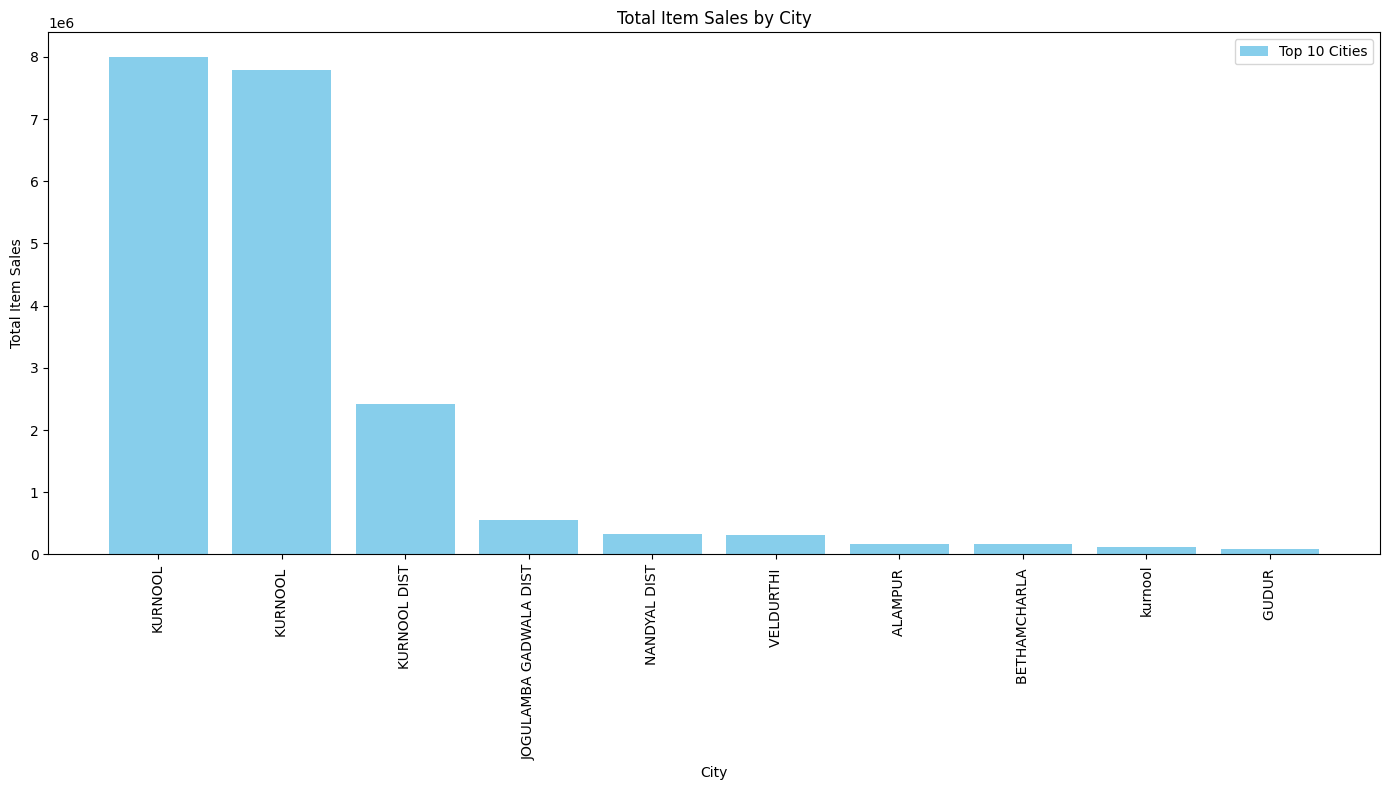

In [10]:
plt.figure(figsize=(14,8))
plt.bar(cities.index[:10], cities.values[:10], color='skyblue', label='Top 10 Cities')
plt.legend()
plt.xlabel('City')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

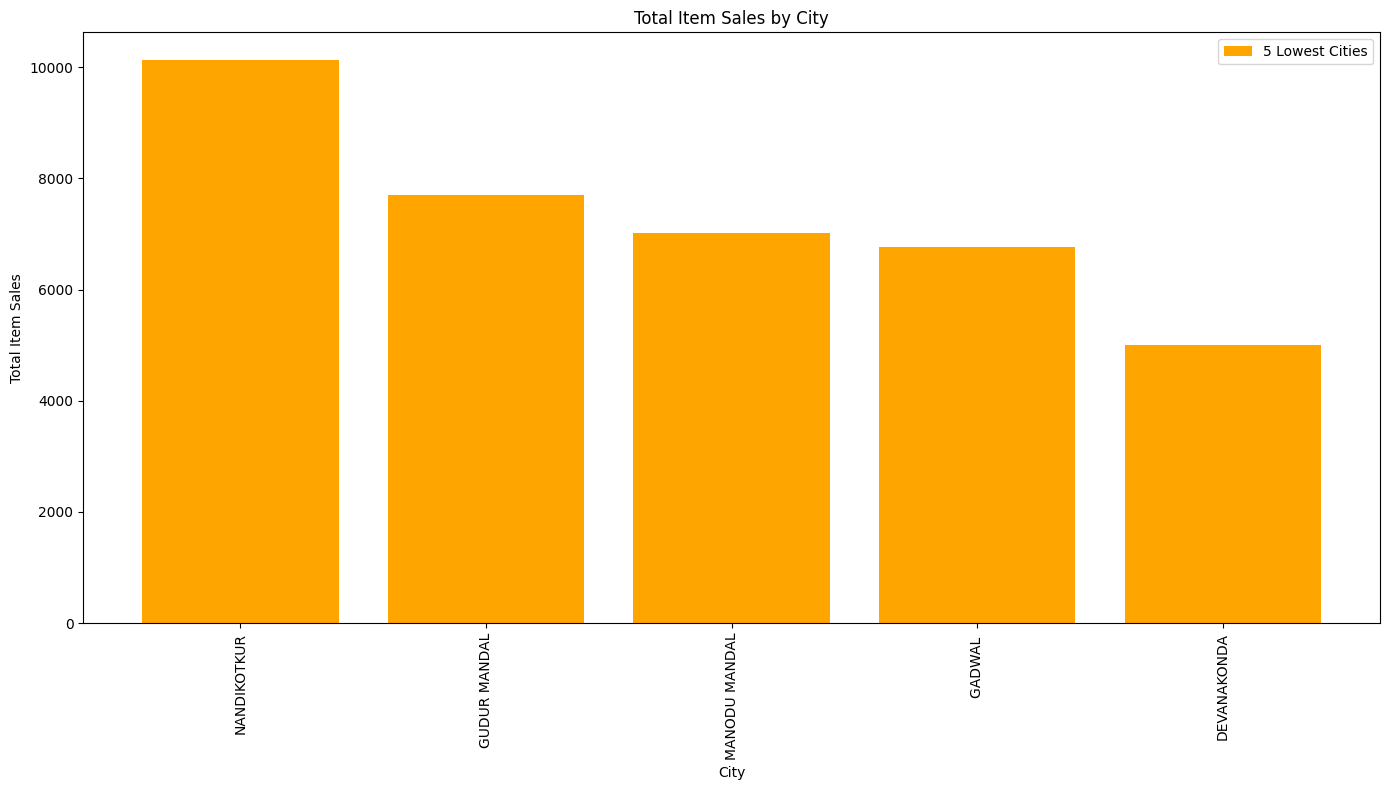

In [11]:
plt.figure(figsize=(14,8))
plt.bar(cities.index[-5:], cities.values[-5:], color='orange', label='5 Lowest Cities')
plt.legend()
plt.xlabel('City')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_13676\96328267.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


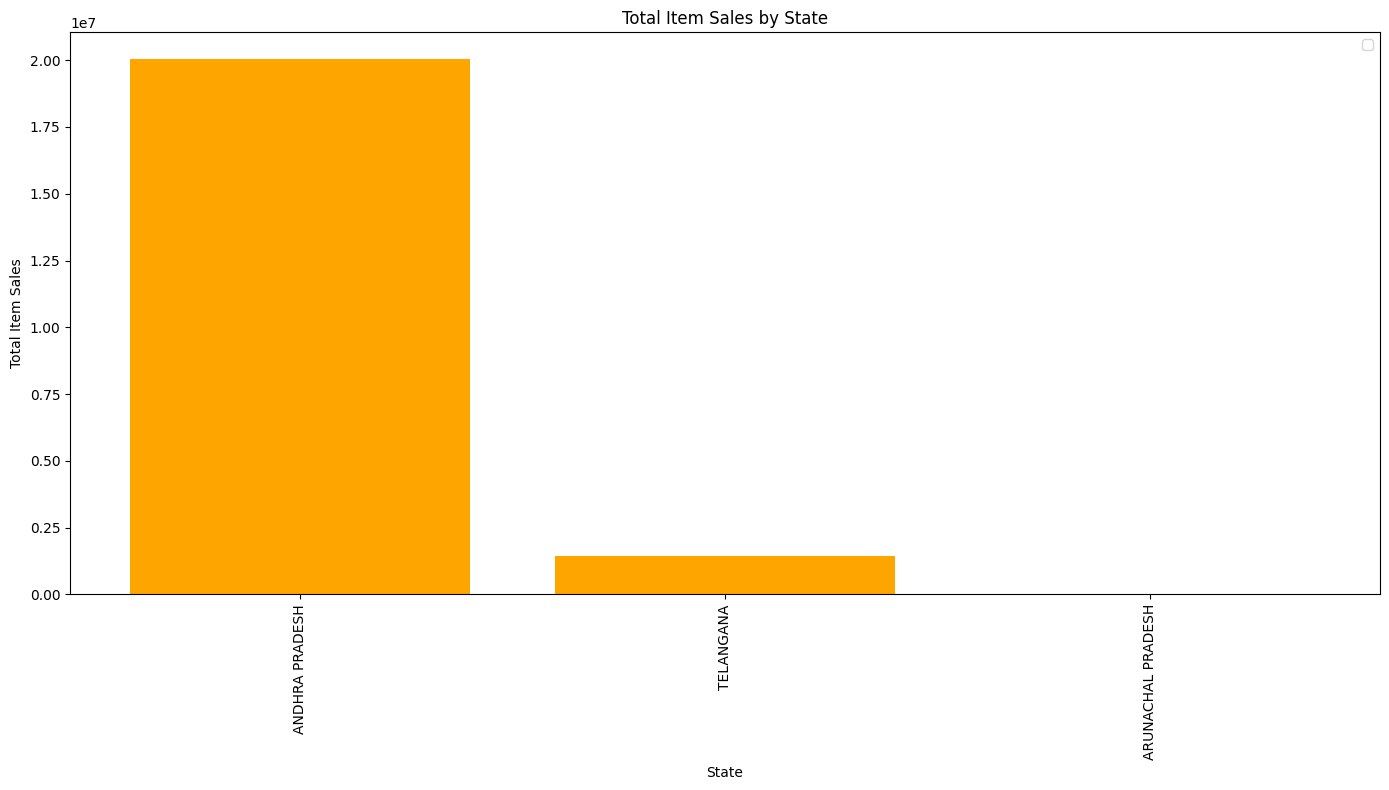

In [12]:
plt.figure(figsize=(14,8))
plt.bar(states.index, states.values, color='orange')
plt.legend()
plt.xlabel('State')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

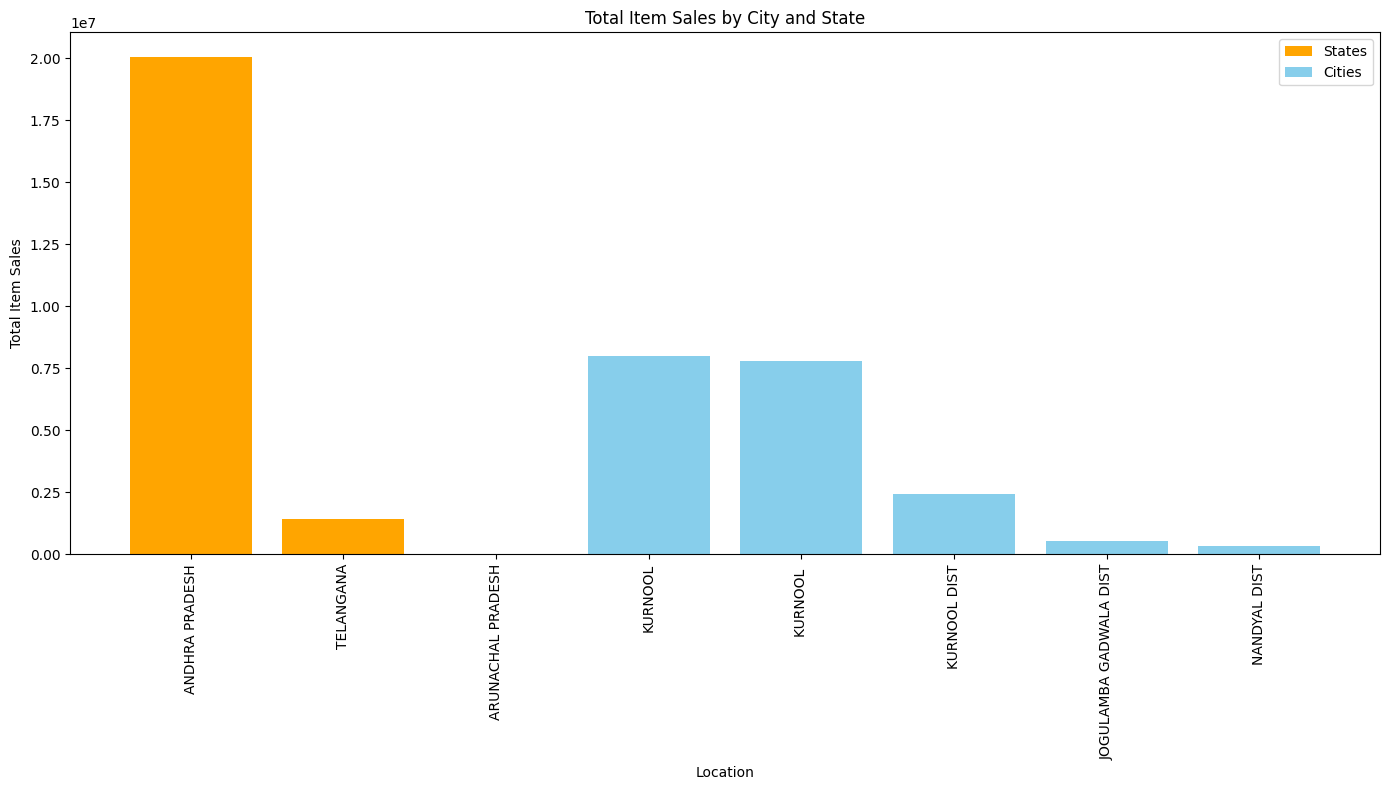

In [13]:
plt.figure(figsize=(14,8))
plt.bar(states.index, states.values, color='orange', label='States')
plt.bar(cities.index[:5], cities.values[:5], color='skyblue', label='Cities')
plt.legend()
plt.xlabel('Location')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by City and State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("state_citi.jpg")
plt.show()

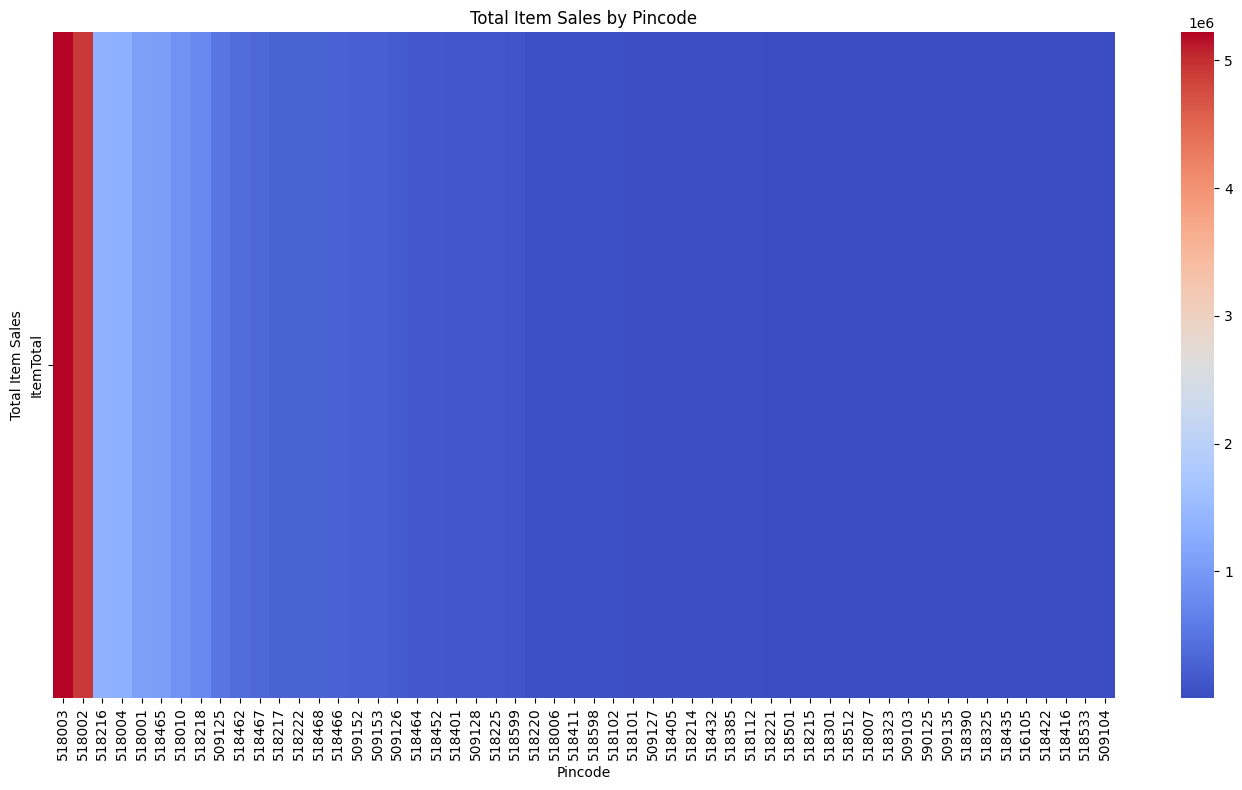

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(pinncode.to_frame().T, cmap='coolwarm', cbar=True)
plt.xlabel('Pincode')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by Pincode')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
data['CustomerName'] = data['CustomerName'].str.strip()

In [16]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [17]:
data.head(3)

,InvoiceNumber,Date,InvoiceType,NetAmount,PaymentMethod,CustomerName,CustomerMobileNumber,Address1,City,Pincode,State,Quantity,UnitPrice,Discount,PromotionalDiscount,BasicAmount,ItemTotal,Description
0,1663,2025-01-01,Sale,31700.01,Cash,GRAMPANCHAYATHI,9392096445,SUDEPALLE VILLAGE,VELDURTHI MANDAL,518216,ANDHRA PRADESH,1,26864.41,0.00,0,26864.41,31700.01,TRF 2017 S + SF022
1,1664,2025-01-01,Sale,15799.99,Cash,P.MADHU,8074892078,KONGANAPADU,KURNOOL,518218,ANDHRA PRADESH,1,13389.83,0.00,0,13389.83,15799.99,TSP 3
2,1665,2025-01-02,Sale,27500.24,Cash,PRESIDENT,8978133398,GR HOMES,KURNOOL,518002,ANDHRA PRADESH,1,23305.28,1439.77,0,23305.28,27500.24,TRF 520 H + TF011


In [51]:
data['CustomerName'] = data['CustomerName'].astype(str)
data['CustomerMobileNumber'] = data['CustomerMobileNumber'].astype(str)

In [52]:
customer_df = data.groupby(['CustomerName', 'CustomerMobileNumber']).agg({
    'InvoiceNumber': 'count',                         # Frequency / Visits
    'NetAmount': 'sum',                               # Monetary
    'Date': ['min', 'max'],                           # Recency and First visit
    'City': pd.Series.mode,                           # Most frequent city
    'Description': lambda x: ', '.join(x.unique())    # Unique models
}).reset_index()

customer_df.columns = ['CustomerName', 'CustomerMobileNumber',
                       'Frequency', 'TotalSpend', 'FirstPurchase', 'LastPurchase',
                       'City', 'ModelsPurchased']

In [53]:
today = data['Date'].max()
customer_df['Recency'] = (today - customer_df['LastPurchase']).dt.days
customer_df['AvgSpend'] = customer_df['TotalSpend'] / customer_df['Frequency']
customer_df['TimeBetweenVisits'] = (customer_df['LastPurchase'] - customer_df['FirstPurchase']).dt.days


In [54]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(customer_df[['Recency', 'Frequency', 'TotalSpend']])
scaled_df = pd.DataFrame(scaled, columns=['RecencyNorm', 'FrequencyNorm', 'MonetaryNorm'], index=customer_df.index)


In [55]:
customer_df['Score'] = (
    (1 - scaled_df['RecencyNorm']) * 0.4 +
    scaled_df['FrequencyNorm'] * 0.3 +
    scaled_df['MonetaryNorm'] * 0.3
)

In [56]:
def label_segment(row):
    if row['Frequency'] == 1:
        return "One-time Buyer"
    elif row['Score'] >= 0.8:
        return "VIP Customer"
    elif row['Score'] >= 0.5:
        return "Regular Customer"
    else:
        return "Location-focused"

In [57]:
customer_df['Segment'] = customer_df.apply(label_segment, axis=1)


In [60]:
import os

os.makedirs("outputs", exist_ok=True)
customer_df.to_csv("outputs/customer_segments_output_new_2025.csv")

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_13676\314090606.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('piechart.jpg')
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


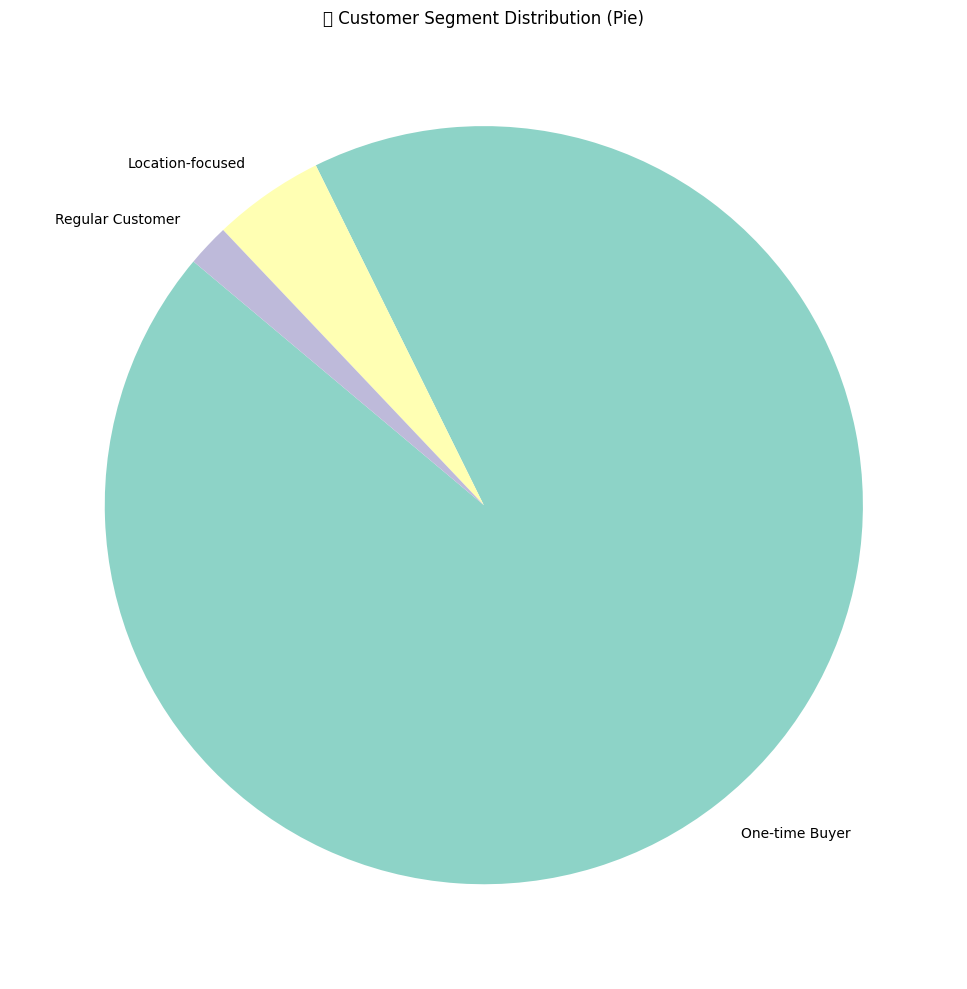

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_13676\314090606.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Set2')
C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_13676\314090606.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('barchart.jpg')
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


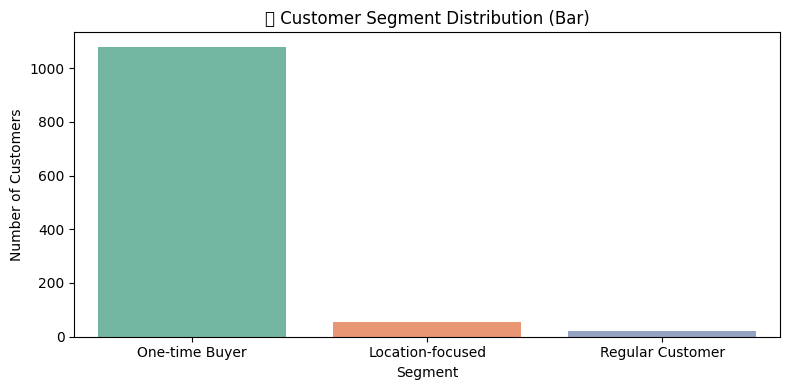

In [48]:
segment_counts = customer_df['Segment'].value_counts()

# Pie chart
plt.figure(figsize=(10,10))
segment_counts.plot.pie( startangle=140, colors=sns.color_palette('Set3'))
plt.title("📊 Customer Segment Distribution (Pie)")
plt.ylabel("")
plt.savefig('piechart.jpg')
plt.tight_layout()
plt.show()

# Bar chart
plt.figure(figsize=(8,4))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Set2')
plt.title("📊 Customer Segment Distribution (Bar)")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.savefig('barchart.jpg')
plt.tight_layout()
plt.show()

In [30]:
model_sales = data.groupby('Description')['NetAmount'].sum().sort_values(ascending=False)


In [47]:
print("\nTotal Sales Value per Model:")
print(model_sales)


Total Sales Value per Model:
Description
TSP 3                     9631420.29
TRF 513 HS + SF007-URC    1016328.75
TRF 518 HS + SF011-URC     936798.65
TSP 2                      573529.66
TRF 710 HS + SF007-URC     524325.64
                             ...    
HCS 8040 H                  12430.00
HCS 8050-RF                 11959.99
TMH 61                      10700.00
TMH 7050                    10400.00
HCS 4025 R                   6799.99
Name: NetAmount, Length: 112, dtype: float64


C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_13676\1776755056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_sales.head(10).values, y=model_sales.head(10).index, palette='coolwarm')


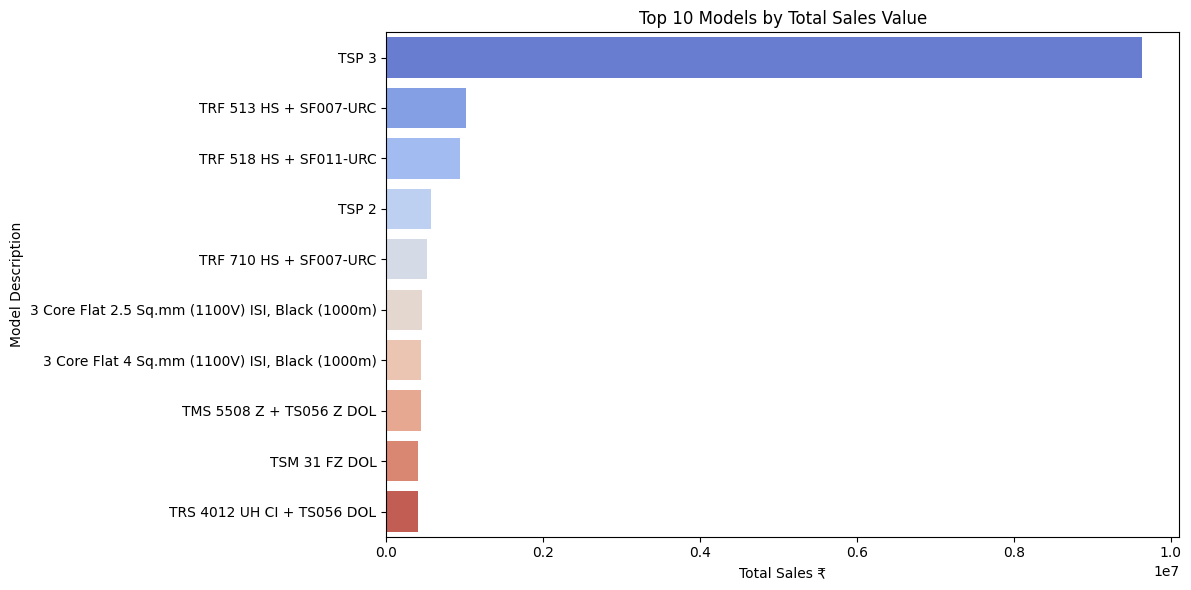

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x=model_sales.head(10).values, y=model_sales.head(10).index, palette='coolwarm')
plt.title("Top 10 Models by Total Sales Value")
plt.xlabel("Total Sales ₹")
plt.ylabel("Model Description")
plt.savefig('ModelImage.jpg')
plt.tight_layout()
plt.show()

In [33]:
units_sold = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("\nUnits Sold per Model:")
print(units_sold)


Units Sold per Model:
Description
3 Core Flat 2.5 Sq.mm (1100V) ISI, Black (1000m)    1766
3 Core Flat 4 Sq.mm (1100V) ISI, Black (1000m)      1231
TSP 3                                                736
3 Core Flat 1.5 Sq.mm (1100V) ISI, Black (1000m)     320
TRF 513 HS + SF007-URC                                58
                                                    ... 
TSM 13 Z DOL                                           1
TSM 6 ZRC DOL                                          1
TSSM 7025 P                                            1
TVSM 2503 RC DOL                                       1
TW6 2020-075 6T056-C3642                               1
Name: Quantity, Length: 112, dtype: int64


C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_13676\761729755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=units_sold.head(10).values, y=units_sold.head(10).index, palette='mako')


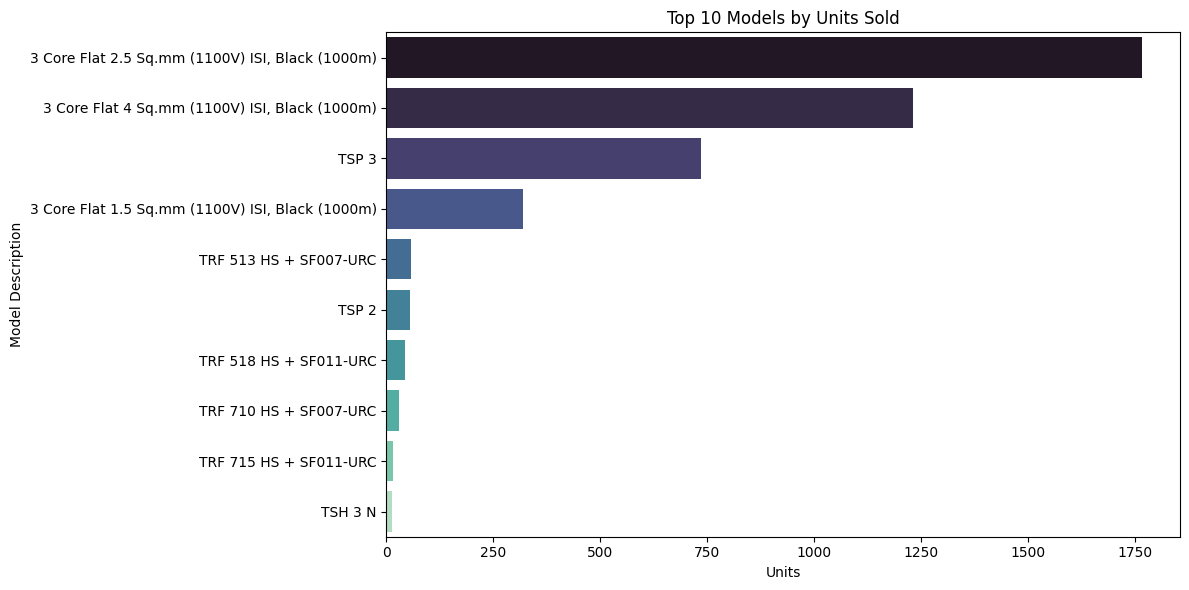

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x=units_sold.head(10).values, y=units_sold.head(10).index, palette='mako')
plt.title("Top 10 Models by Units Sold")
plt.savefig('unitssold.jpg')
plt.xlabel("Units")
plt.ylabel("Model Description")
plt.tight_layout()
plt.show()

In [35]:
model_city_sales = data.groupby(['Description', 'City'])['NetAmount'].sum().reset_index()
pivot_model_city = model_city_sales.pivot(index='Description', columns='City', values='NetAmount').fillna(0)


In [36]:
top_models = model_sales.head(10).index
top_cities = data['City'].value_counts().head(5).index
filtered_pivot = pivot_model_city.loc[top_models, top_cities]

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_13676\666707358.py:6: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


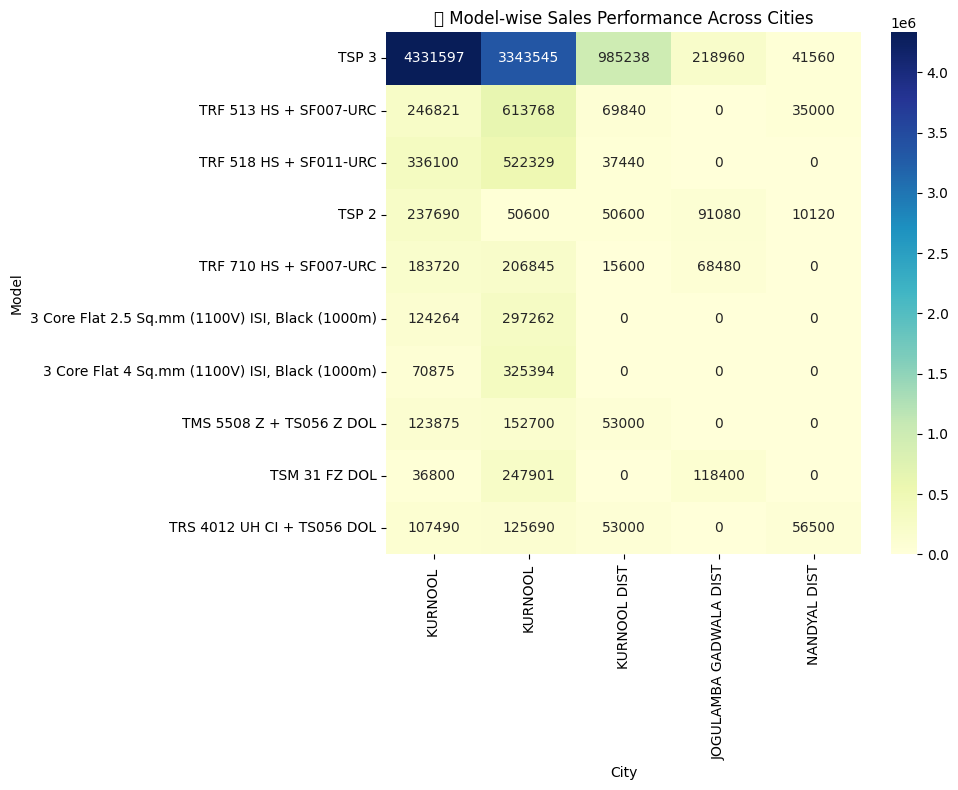

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(filtered_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("📍 Model-wise Sales Performance Across Cities")
plt.xlabel("City")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_13676\3740065485.py:8: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig("heatmap of Unique Customers.jpg")
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


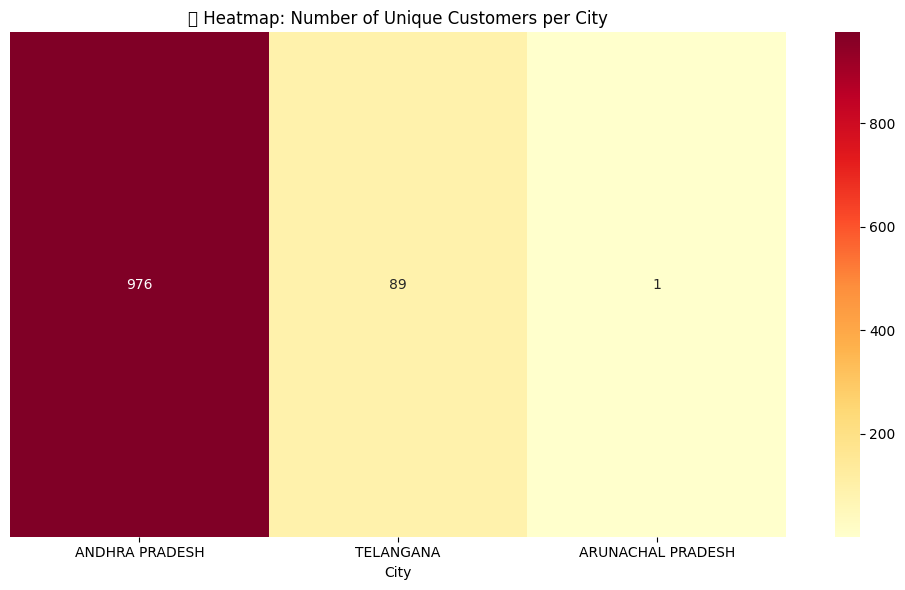

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_13676\3740065485.py:19: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig("heatmap of Sales per State.jpg")
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


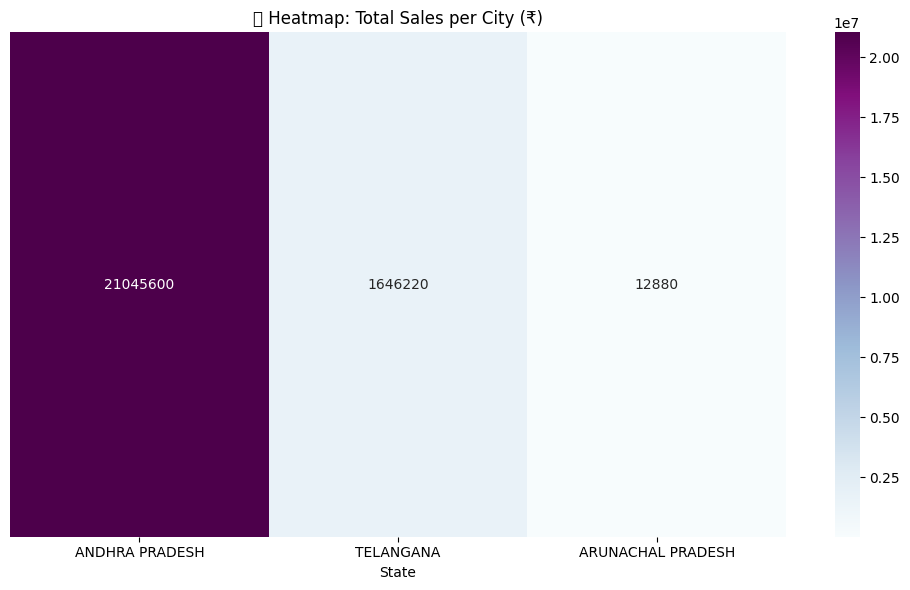

In [44]:
city_customer_counts = data.groupby('State')['CustomerName'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(city_customer_counts.to_frame().T, cmap='YlOrRd', annot=True, fmt='d')
plt.title("📍 Heatmap: Number of Unique Customers per City")
plt.yticks([])
plt.xlabel("City")
plt.savefig("heatmap of Unique Customers.jpg")
plt.tight_layout()
plt.show()

state_sales = data.groupby('State')['NetAmount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(state_sales.to_frame().T, cmap='BuPu', annot=True, fmt=".0f")
plt.title("📍 Heatmap: Total Sales per City (₹)")
plt.yticks([])
plt.xlabel("State")
plt.savefig("heatmap of Sales per State.jpg")
plt.tight_layout()
plt.show()


In [39]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


data['YearMonth'] = data['Date'].dt.to_period('M').astype(str) 

In [40]:
monthly_sales = data.groupby('YearMonth')['NetAmount'].sum().reset_index()

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_13676\3566391170.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('Sales Per Month.jpg')
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


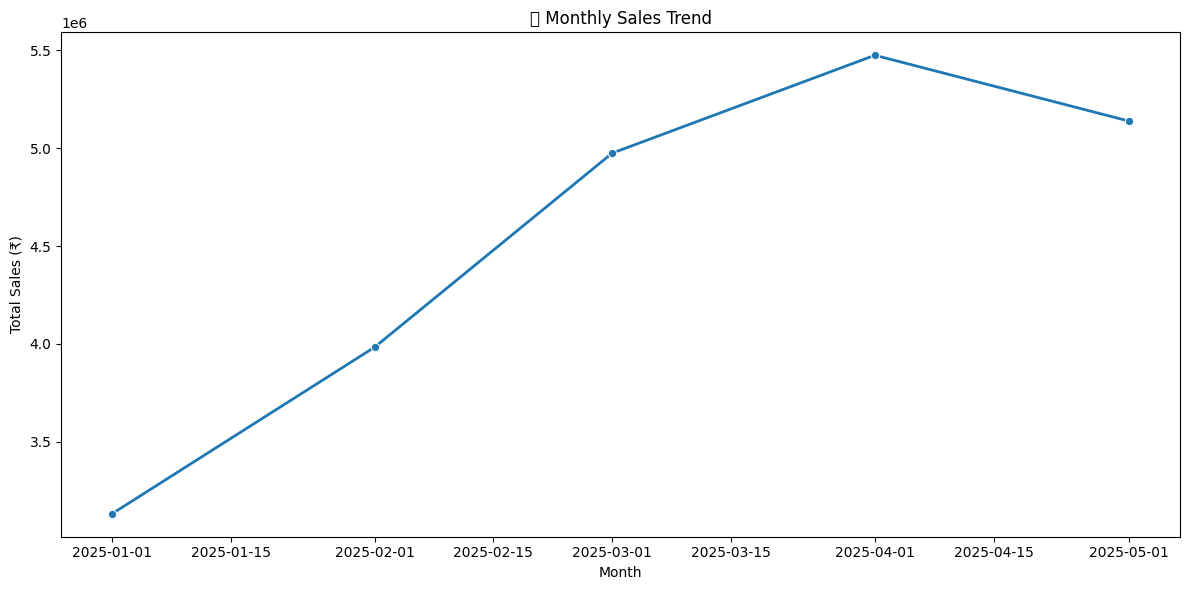

In [46]:
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['YearMonth'])
monthly_sales = monthly_sales.sort_values('YearMonth')

# Plot Monthly Sales
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='NetAmount', marker='o', linewidth=2)
plt.title("📈 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.savefig('Sales Per Month.jpg')
plt.tight_layout()
plt.show()